# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khandyga
Processing Record 2 of Set 1 | paredon
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | south venice
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | kasson
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | iskushuban
Processing Record 19 of Set 1 | ad dana
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | garhwa
Process

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khandyga,62.6667,135.6000,7.52,96,100,0.57,RU,1725294548
1,paredon,16.0333,-93.8667,29.27,68,97,1.82,MX,1725294549
2,tazovsky,67.4667,78.7000,6.84,94,100,4.16,RU,1725294550
3,puerto ayora,-0.7393,-90.3518,21.97,80,93,0.89,EC,1725294551
4,south venice,27.0531,-82.4243,30.01,36,20,7.72,US,1725294552


In [80]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khandyga,62.6667,135.6000,7.52,96,100,0.57,RU,1725294548
1,paredon,16.0333,-93.8667,29.27,68,97,1.82,MX,1725294549
2,tazovsky,67.4667,78.7000,6.84,94,100,4.16,RU,1725294550
3,puerto ayora,-0.7393,-90.3518,21.97,80,93,0.89,EC,1725294551
4,south venice,27.0531,-82.4243,30.01,36,20,7.72,US,1725294552


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

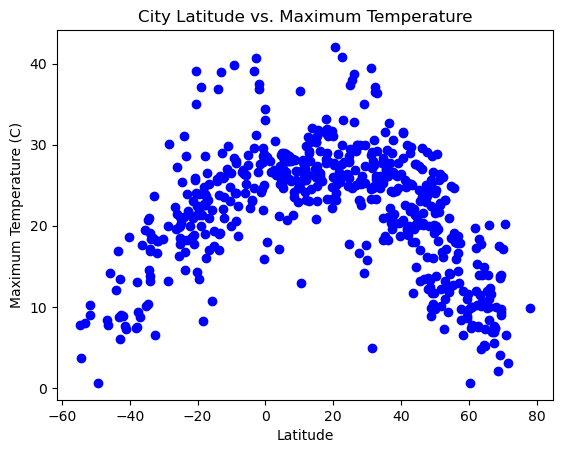

In [114]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', color = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

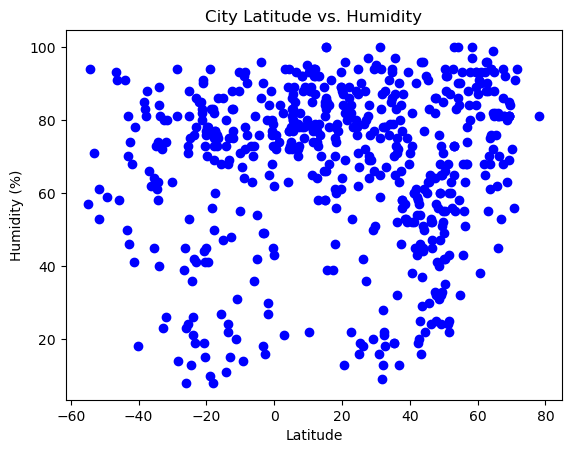

In [117]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', color = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

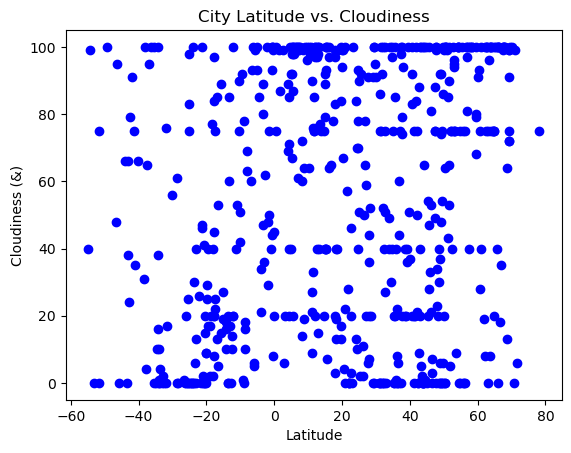

In [120]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'o', color = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (&)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

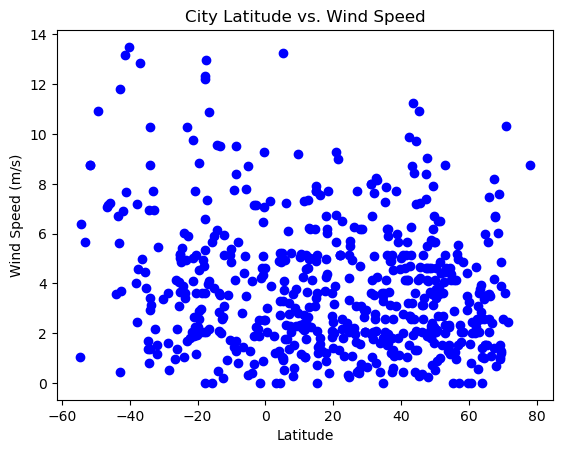

In [123]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = 'o', color = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, text_coordinates):
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khandyga,62.6667,135.6000,7.52,96,100,0.57,RU,1725294548
1,paredon,16.0333,-93.8667,29.27,68,97,1.82,MX,1725294549
2,tazovsky,67.4667,78.7000,6.84,94,100,4.16,RU,1725294550
4,south venice,27.0531,-82.4243,30.01,36,20,7.72,US,1725294552
5,udachny,66.4167,112.4000,12.33,70,100,3.51,RU,1725294254


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,21.97,80,93,0.89,EC,1725294551
6,blackmans bay,-43.0167,147.3167,6.07,81,38,0.45,AU,1725294554
8,waitangi,-43.9535,-176.5597,12.12,91,66,3.58,NZ,1725294557
11,edinburgh of the seven seas,-37.0676,-12.3116,8.73,66,95,12.84,SH,1725294560
12,port-aux-francais,-49.3500,70.2167,0.61,59,100,10.92,TF,1725294561


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4948038340801084


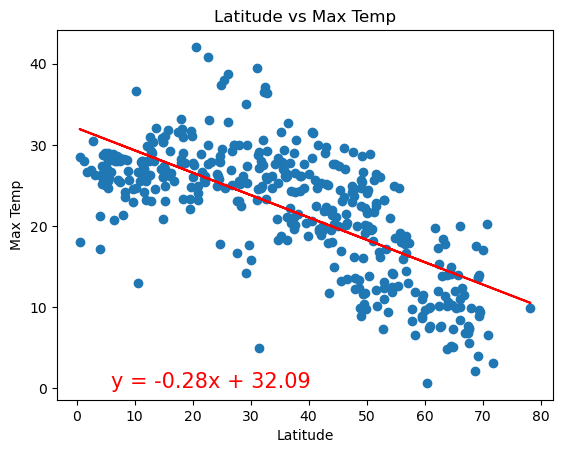

In [91]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, "Max Temp", (6,0))

The r-value is: 0.5418665873035251


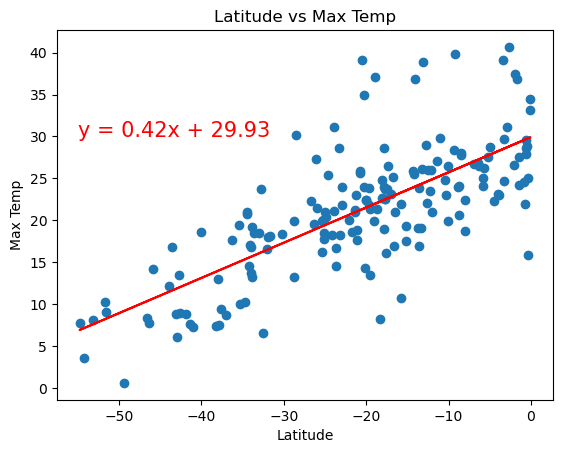

In [93]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, "Max Temp", (-55,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007745579442354872


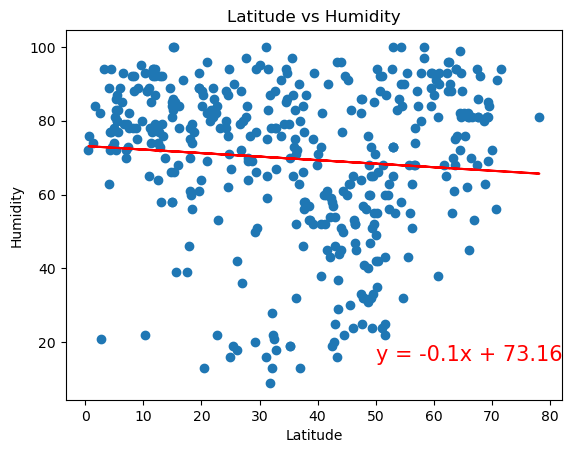

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, "Humidity", (50,15))

The r-value is: 0.0010349096326314107


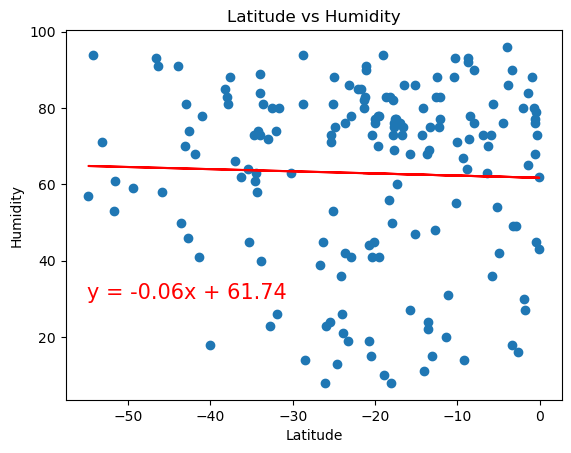

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, "Humidity", (-55,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 5.512019359820903e-05


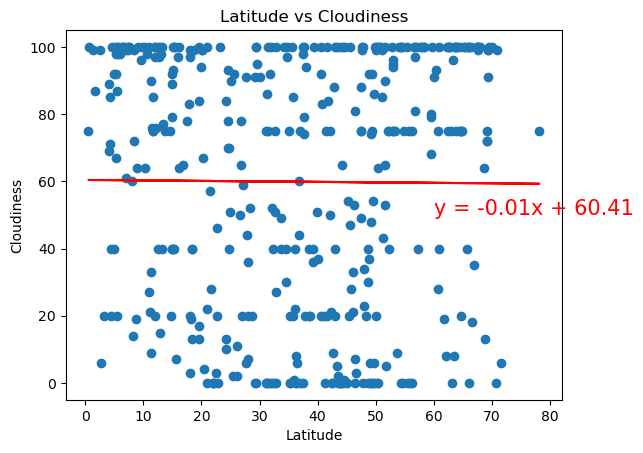

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, "Cloudiness", (60,50))

The r-value is: 0.014120966799105857


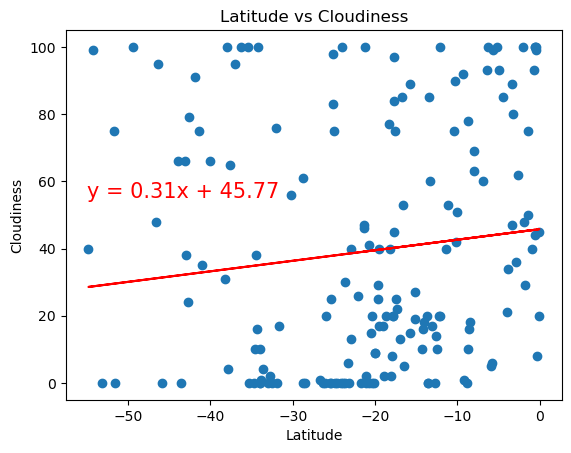

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, "Cloudiness", (-55,55))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0002184273788317116


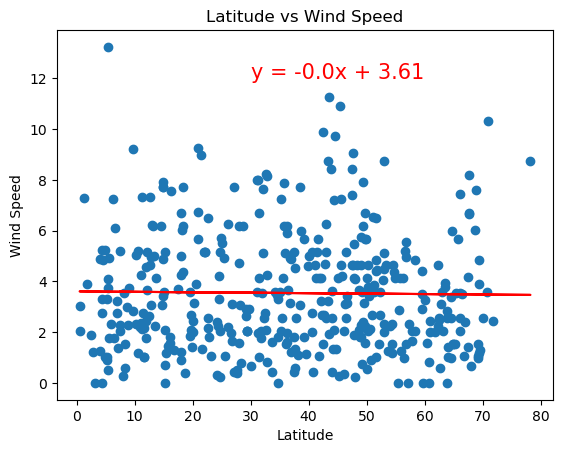

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, "Wind Speed", (30,12))

The r-value is: 0.05006647054632565


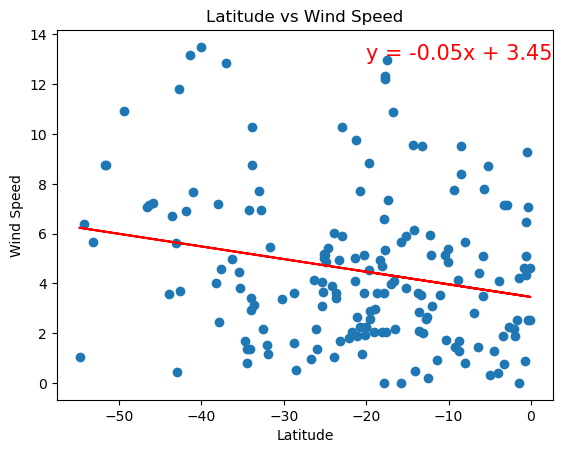

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, "Wind Speed", (-20,13))

**Discussion about the linear relationship:** YOUR RESPONSE HERE